In [2]:
from pycaret.nlp import *
import cargar_corpus
import pickle
import pandas as pd
from pprint import pprint


id = 70521

import os
# define the name of the directory to be created
path_LDA = "../Experimentos Modelos/LDA/exp-"+ str(id) + "/"
path_HDP = "../Experimentos Modelos/HDP/exp-"+ str(id) + "/"
path_LSI = "../Experimentos Modelos/LSI/exp-"+ str(id) + "/"
path_NMF = "../Experimentos Modelos/NMF/exp-"+ str(id) + "/"

ruta_modelo_LDA = path_LDA + "LDA-Model"
ruta_modelo_HDP = path_HDP + "HDP-Model"
ruta_modelo_LSI = path_LSI + "LSI-Model"
ruta_modelo_NMF = path_NMF + "NMF-Model"

train_data_dir = path_LDA + "/train_data_.sav"
train_tokenized_words_dir = path_LDA + "/train_tokenized_words.sav"
train_corpus_dir = path_LDA + "/train_corpus.sav"
train_id2word_dir = path_LDA + "/train_id2word.sav"

data_ = pickle.load(open(train_data_dir, 'rb'))
tokenized_words = pickle.load(open(train_tokenized_words_dir, 'rb'))                                
corpus = pickle.load(open(train_corpus_dir, 'rb'))
id2word = pickle.load(open(train_id2word_dir, 'rb')) #Diccionario gensin


lda = load_model(ruta_modelo_LDA)
hdp = load_model(ruta_modelo_HDP)
lsi = load_model(ruta_modelo_LSI)
nmf = load_model(ruta_modelo_NMF)


document_topic_matrix_dir = path_LDA + "/document_topic_matrix.sav"
topic_word_matrix_dir = path_LDA + "/topic_word_matrix.sav"

document_topic_matrix = pickle.load(open(document_topic_matrix_dir, 'rb'))
topic_word_matrix = pickle.load(open(topic_word_matrix_dir, 'rb'))

#Cargar DF de pdf's

path_exp = "../Modelo Final/dataset/"
data_train_dir = path_exp + "data_train.df"
data_test_dir = path_exp + "data_test.df"

data = pickle.load(open(data_train_dir, 'rb'))
data_unseen = pickle.load(open(data_test_dir, 'rb'))

Model Sucessfully Loaded
Model Sucessfully Loaded
Model Sucessfully Loaded
Model Sucessfully Loaded


In [3]:
ldatopics = lda.show_topics(formatted=False)
hdptopics = hdp.show_topics(formatted=False)
lsitopics = lsi.show_topics(formatted=False)
#nmftopics = nmf.show_topics(formatted=False)

In [4]:
def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(2, limit, 2):
        lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v', multi_core = True)
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(2, limit, 2)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

# Evaluating all the topic models
Any topic model which can come up with topic terms can be plugged into the coherence pipeline. You can even plug in an NMF topic model created with scikit-learn.

In [5]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsitopics]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdptopics]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldatopics]

In [6]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from pprint import pprint

lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=tokenized_words, dictionary=id2word, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=tokenized_words, dictionary=id2word, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=tokenized_words, dictionary=id2word, window_size=10).get_coherence()

In [7]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

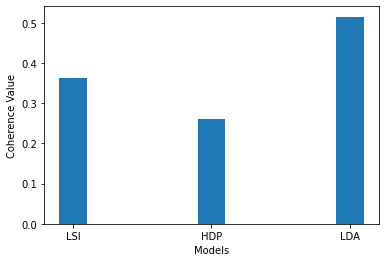

In [8]:
import matplotlib.pyplot as plt
import numpy as np
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])

LDA

In [9]:
topn = 20
u_mass_coherence = lda.top_topics(corpus=corpus, texts=tokenized_words, dictionary=id2word, window_size=None, coherence='u_mass', topn=topn, processes=- 1)

c_v_coherence = lda.top_topics(corpus=corpus, texts=tokenized_words, dictionary=id2word, window_size=None, coherence='c_v', topn=topn, processes=- 1)

c_uci_coherence = lda.top_topics(corpus=corpus, texts=tokenized_words, dictionary=id2word, window_size=None, coherence='c_uci', topn=topn, processes=- 1)

c_npmi_coherence = lda.top_topics(corpus=corpus, texts=tokenized_words, dictionary=id2word, window_size=None, coherence='c_npmi', topn=topn, processes=- 1)

In [35]:
#u_mass_coherence

In [28]:
#u_mass_coherence[0][0]

# u_mass_coherence

In [33]:
u_mass_c = 0

for u_mass in u_mass_coherence:
    u_mass_c = u_mass_c + u_mass[1]

u_mass_c = u_mass_c/14

In [34]:
u_mass_c

-0.7890940276619045

# c_v_coherence

In [36]:
c_v_c = 0

for c_v in c_v_coherence:
    c_v_c = c_v_c + c_v[1]

c_v_c = c_v_c/14

In [37]:
c_v_c

0.4955622127265316

# c_uci_coherence

In [40]:
c_uci_c = 0

for c_uci in c_uci_coherence:
    c_uci_c = c_uci_c + c_uci[1]

c_uci_c = c_uci_c/14

In [41]:
c_uci_c

0.2918043575116362

# c_npmi_coherence

In [44]:
c_npmi_c = 0

for c_npmi in c_npmi_coherence:
    c_npmi_c = c_npmi_c + c_npmi[1]

c_npmi_c = c_npmi_c/14

In [45]:
c_npmi_c

0.045235672186085554

In [38]:
#c_uci_coherence

In [39]:
#c_npmi_coherence